<a href="https://colab.research.google.com/github/codefinn9988/Ml_learn/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# implement linear regression
# y=β0​+β1​X
# B0 = intercept
# B1 = slope
# y = dependent variable
# x = independent variable

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# 1. generate data
torch.manual_seed(42)
x = torch.arange(0,10,0.1).unsqueeze(1)
noise = torch.randn(x.size()) #100,1
y = 2*x+1+ noise # 2: slope , 1: intercept y= b1x + b0 + noise

# 2. define the model
class LinearRegression(nn.Module): # LR: sub class of nn.Module
  def __init__(self):
      super().__init__()
      self.linear = nn.Linear(1,1) # 1,1 : input & output

  def forward(self,x):
    return self.linear(x)

model = LinearRegression()

# 3. loss and optimizer

criterion = nn.MSELoss() # Mean Seqare Error default.

# parameter=parameter−learning_rate×parameter.grad
optimizer = optim.SGD(model.parameters(),lr =0.01)

# 4. Training loop
epochs = 1000
losses = []
for epoch in range(epochs):
  #forward pass
  y_pred = model(x)
  loss = criterion(y_pred,y)
  losses.append(loss.item())

  #backwad pass
  optimizer.zero_grad() # Reset gradients
  loss.backward() #compute gradient via backpropagation
  optimizer.step() # update the model parameter

  #print progress  every 100 epoch
  if(epoch + 1)%100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}')


# 5. Evaluate
w = model.linear.weight.item()
b = model.linear.bias.item()
print(f'Learned parameters: w = {w:.3f}, b = {b:.3f}')

# predication
x_new = torch.tensor([[5.0]])
y_new = model(x_new)
print(f'Prediction for x=5: {y_new.item():.3f}')
print(losses[-1])


# todo
#3. split the data into training , testing and make prediction
#4. make a project about House Price Prediction using linear regression
#5. Read paper https://arxiv.org/pdf/1611.03530

Epoch [100/1000], Loss:  1.2216
Epoch [200/1000], Loss:  1.0586
Epoch [300/1000], Loss:  0.9983
Epoch [400/1000], Loss:  0.9760
Epoch [500/1000], Loss:  0.9677
Epoch [600/1000], Loss:  0.9647
Epoch [700/1000], Loss:  0.9636
Epoch [800/1000], Loss:  0.9631
Epoch [900/1000], Loss:  0.9630
Epoch [1000/1000], Loss:  0.9629
Learned parameters: w = 1.996, b = 1.078
Prediction for x=5: 11.057
0.9629366397857666


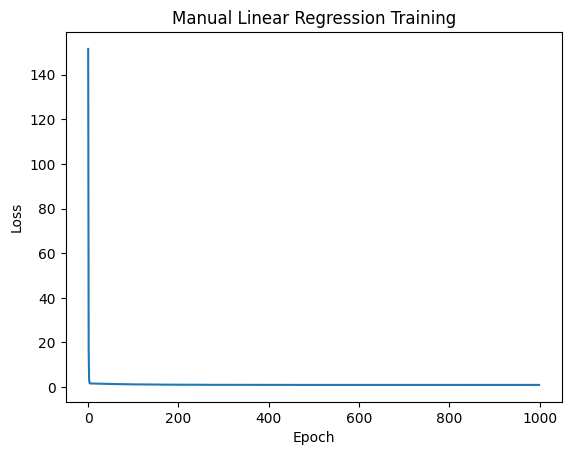

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Manual Linear Regression Training")
plt.show()

In [ ]:
# manually
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#1 Generate the data
torch.manual_seed(42)
weight = 0.7
bias = 0.3
X = torch.arange(1,51,1).unsqueeze(1)
Y = weight *X + bias

# Define the model

class LinearRegression():
  def __init__(self):
    super().__init__()

    # self.linear = nn.Linear(1,1)
    #weights
    self.weight = torch.randn(1,dtype=torch.float,requires_grad=False)
    #bias
    self.bias =torch.randn(1,dtype=torch.float,requires_grad=False)
    self.x = None


  def forward(self,x):
    self.x = x
    return self.weight*x+ self.bias;

  def backward(self,dloss_d_pred):
    self.weight_grad = torch.mean(dloss_d_pred*self.x)
    self.bias_grad = torch.mean(dloss_d_pred)

    # Backpropagation computes the gradient of a loss function
    #with respect to the weights of the network
    # for a single input–output example,
    # dl/dy_pred = 2*(y_pred-y_true)
    # dl/dw = dl/dy_pred * dy_pred/dw
    # dy_pred/dw = x (product rule )
    # dl/db = dl/dy_pred * dy_pred/db
    # dy_pred/db = 1 (db/db)



model  =LinearRegression()
lr = 0.01
epochs = 100


#training loop
losses = []
for epoch in range(epochs):
  #forward pass
  y_pred = model.forward(X)

  #compute loss
  loss = torch.mean(y_pred-Y)**2
  losses.append(loss.item())

  #compute derivative  of loss w.r.t predictions
  # dl/dy_pred = 2*(y_pred-y_true)
  dloss_d_pred = 2*(y_pred-Y)/len(X)

  #backward pass

  model.backward(dloss_d_pred)

# Manual parameter update (gradient descent)

  model.weight -=lr* model.weight_grad
  model.bias -=lr*model.bias_grad


Learned weight: 0.705, bias: 0.141
[89.03030395507812, 38.513092041015625, 16.69745635986328, 7.263763427734375, 3.176063299179077, 1.399398922920227, 0.6236467361450195, 0.28262341022491455, 0.13121698796749115, 0.06303691864013672, 0.031723570078611374, 0.016958795487880707, 0.00976109504699707, 0.006110775284469128, 0.004177425988018513, 0.003107585711404681, 0.0024911905638873577, 0.002123447135090828, 0.0018981080502271652, 0.001756909303367138, 0.0016671328339725733, 0.0016093174926936626, 0.0015717949718236923, 0.0015473384410142899, 0.001531328191049397, 0.0015207409160211682, 0.0015137495938688517, 0.0015090025262907147, 0.0015057326527312398, 0.0015035998076200485, 0.0015020360006019473, 0.0015009704511612654, 0.0015001193387433887, 0.0014995052479207516, 0.001499018631875515, 0.0014985435409471393, 0.001498115248978138, 0.0014977424871176481, 0.001497491030022502, 0.0014972456265240908, 0.001496884971857071, 0.0014966411981731653, 0.001496270764619112, 0.0014960209373384714,

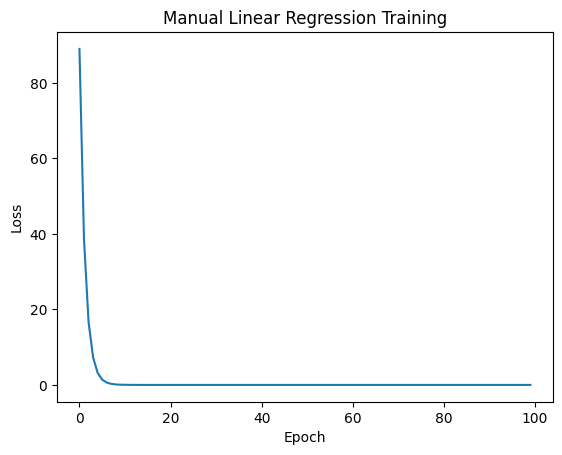

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Manual Linear Regression Training")
plt.show()

In [ ]:
print(f"Learned weight: {model.weight.item():.3f}, bias: {model.bias.item():.3f}")

Learned weight: 0.705, bias: 0.141
